# Group exam
By Georg Risøy, Lea Bjørnemo and Ninad Hagi

# Reveiwing dataset 

In reviewing the dataset, we've identified columns that appear to be irrelevant for our analysis. The columns "Message ID," "Message timestamp," "Message date," and "Message time" seem to hold information related to when the data is entered, which is not crucial for our purposes. Additionally, columns such as "Start time," "Start time," "End time," "End time," and "Catch area" will be replaced with a consolidated "Duration" column. However, we acknowledge that the time of day might still be relevant for understanding fish behavior.

We've opted to use "Location start" and "Location stop" instead of "Main area start," "Main area end," "Main area start (code)," and "Main area end (code)" since all these columns seem to be interconnected.

Upon further examination, we noticed that "Location start (code)" and "Location stop (code)" contained numerous empty fields. To address this, we **recommend** using start position latitude/longitude and stop position latitude/longitude, which should provide more meaningful data compared to the (code) fields, likely resulting in higher precision.

Another issue arises with the "Bruttotonnasje" column, where a significant number (approximately 230,000) of entries are missing. Consequently, we have decided to drop both "Gross tonnage" columns in favor of relying on boat length and width, which offer more comprehensive information. Similarly, we are simplifying the dataset by using only the "Vessel length" column instead of both 'Length group' and 'Length group (code)'. Although this may introduce some complexity in categorizing various vessel types, it should contribute to better precision in our analysis.

Finally, to **streamline** the data further, we have chosen to focus on the "Hovedart FAO" column, focusing only on 'Torsk', 'Sei', 'Dypvannsreke', 'Hyse' and 'Lange', and by using Hovedart FAO we use only the boats where these types of fish where the biggest catch for the boat.

### Impoting and reading 
Reading and printing out the first 5 lines 
Using sep=';' because in the csv file it is split with ";"

In [2]:
# Imports for models 
# matplotlib and seaborn for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Processing and repports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# KNN 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, validation_curve
# Deep learning 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE
# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


c:\Users\47476\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('elektronisk-rapportering-ers-2018-fangstmelding-dca-simple.csv', sep=';')
df.head()

,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Hovedområde start (kode),...,Art - FDIR,Art - gruppe (kode),Art - gruppe,Rundvekt,Lengdegruppe (kode),Lengdegruppe,Bruttotonnasje 1969,Bruttotonnasje annen,Bredde,Fartøylengde
0,1497177,01.01.2018,01.01.2018,00:00,31.12.2017,31.12.2017,00:00,"-60,35","-46,133",NaN,...,Antarktisk krill,506.0,Antarktisk krill,706714.0,5.0,28 m og over,9432.0,NaN,"19,87","133,88"
1,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Hyse,202.0,Hyse,9594.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
2,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Torsk,201.0,Torsk,8510.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
3,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Blåkveite,301.0,Blåkveite,196.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
4,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Sei,203.0,Sei,134.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"


**Handling Missing Values (NaN):**

When analyzing datasets, identifying NaN (Not a Number) values is crucial for understanding the completeness and usability of different columns. By examining these missing values, we can make informed decisions about whether to remove entire rows or consider alternative approaches like imputation. This process helps us determine which columns are reliable and valuable for our analysis, ensuring the integrity and accuracy of our data-driven decisions."

In [4]:

nan_count = df.isna().sum()

print(nan_count)

#Defining irrelevant colons so they are easier to manage and delete if needed 
irrelevante_col = ['Melding ID', 'Meldingstidspunkt', 'Meldingsdato', 'Meldingsklokkeslett','Starttidspunkt', 'Startklokkeslett', 'Stoppdato',
                   'Stopptidspunkt', 'Stoppklokkeslett','Hovedområde start', 'Hovedområde stopp', 'Hovedområde start (kode)', 'Fangstår',
                   'Hovedområde stopp (kode)', 'Lokasjon start (kode)', 'Lokasjon stopp (kode)', 'Bruttotonnasje 1969', 'Bruttotonnasje annen',
                   'Lengdegruppe (kode)', 'Lengdegruppe', 'Hovedart FAO (kode)', 'Hovedart - FDIR (kode)', 'Art FAO (kode)', 
                   'Art - FDIR (kode)', 'Art FAO', 'Art - gruppe (kode)', 'Art - gruppe', 'Redskap FAO (kode)', 'Redskap FAO', 'Redskap FDIR']



Melding ID                       0
Meldingstidspunkt                0
Meldingsdato                     0
Meldingsklokkeslett              0
Starttidspunkt                   0
Startdato                        0
Startklokkeslett                 0
Startposisjon bredde             0
Startposisjon lengde             0
Hovedområde start (kode)      2001
Hovedområde start             4124
Lokasjon start (kode)         2001
Havdybde start                   0
Stopptidspunkt                   0
Stoppdato                        0
Stoppklokkeslett                 0
Varighet                         0
Fangstår                         0
Stopposisjon bredde              0
Stopposisjon lengde              0
Hovedområde stopp (kode)      1962
Hovedområde stopp             4124
Lokasjon stopp (kode)         1962
Havdybde stopp                   0
Trekkavstand                    24
Redskap FAO (kode)               0
Redskap FAO                    188
Redskap FDIR (kode)            188
Redskap FDIR        

### Removing Colums 

To make the data more efficient, unnecessary columns can be efficiently removed using Pandas' drop function. The process involves iterating through a predefined list of irrelevant columns and eliminating them from the DataFrame (df). The axis=1 parameter specifies that columns, rather than rows, are being dropped. Instead of imputing missing values with the mean, which may not be appropriate when fewer than 5000 NaN values are present in the remaining columns, it's often preferable to drop rows containing NaN values. This approach ensures cleaner and more reliable data. 

In [5]:
for col in irrelevante_col:
     df = df.drop(col, axis=1)

#Dropping Rows with NaN     
df.dropna()
#Displaying the First 5 Rows
df.head()

,Startdato,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Hovedart FAO,Art - FDIR,Rundvekt,Bredde,Fartøylengde
0,31.12.2017,"-60,35","-46,133",-2740,1440,"-60,4","-46,15",-805,5649.0,53.0,Antarktisk krill,Antarktisk krill,706714.0,"19,87","133,88"
1,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Hyse,Hyse,9594.0,"12,6","56,8"
2,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Hyse,Torsk,8510.0,"12,6","56,8"
3,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Hyse,Blåkveite,196.0,"12,6","56,8"
4,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Hyse,Sei,134.0,"12,6","56,8"


Considering the risk of data loss, we decided to remove rows containing NaN values rather than employing imputation methods, based on the specific characteristics of our dataset. This approach was chosen to maintain data integrity and relevance.

### Why are we dropping 

It's important to recognize that removing rows containing NaN values can result in data loss. Alternative strategies, such as filling NaNs with the mean, median, or specific values, were considered to accommodate the data's characteristics. However, after careful consideration, we opted to remove these rows to ensure the integrity of our analysis.

The following lines of code efficiently drop columns listed in `irrelevant_col` to optimize the dataset for analytical purposes. Columns are eliminated based on criteria such as irrelevance, high prevalence of missing values, redundancy, or inconsistencies. This selective process is guided by our analysis objectives, aiming to refine the dataset to better meet specific analytical standards and improve overall data quality.

### Visulization of NaN values 

We have cleaned and prepared our dataset for analysis. The accompanying bar chart demonstrates the impact of removing rows with missing values (NaN) from our DataFrame. The significant reduction in missing values indicates that this operation effectively minimizes incomplete data and maintains data integrity.

Dropping rows is computationally efficient, especially for large datasets where the proportion of missing data is small. This method not only cleans up the data but also ensures minimal impact on the overall dataset size.

The significant reduction in missing values post-removal indicates the effectiveness of this operation with minimal impact on data integrity.
The computational efficiency of dropping rows is highlighted, especially for large datasets, where the loss is negligible compared to the dataset's overall size. Given these outcomes, removing the missing values was a smart and strategic decision for this particular dataset.

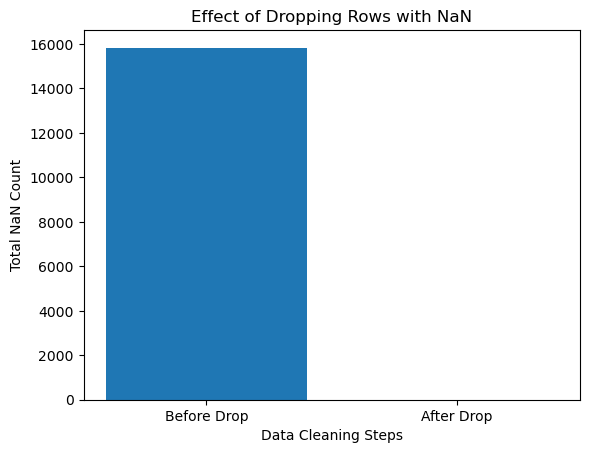

In [6]:
# Get NaN counts before and after dropping rows
initial_nan_count = df.isna().sum()
df.dropna(inplace=True)
final_nan_count = df.isna().sum()

# Plot the counts
plt.bar(['Before Drop', 'After Drop'], [initial_nan_count.sum(), final_nan_count.sum()])
plt.xlabel('Data Cleaning Steps')
plt.ylabel('Total NaN Count')
plt.title('Effect of Dropping Rows with NaN')
plt.show()


Calculating and printing the count of occurrences for each unique value in the 'Hovedart FAO' column of the DataFrame. It helps provide insights into the distribution of different values within that specific column.

In [7]:
counts = df['Hovedart FAO'].value_counts()

print(counts)

Hovedart FAO
Torsk                   86058
Sei                     66287
Dypvannsreke            36977
Hyse                    28166
Lange                   13387
                        ...  
Sandflyndre                 3
Makrellstørje               2
Various squids nei *        2
Blåhval                     1
Annen laksefisk             1
Name: count, Length: 67, dtype: int64


# Fish types and selection criteria
Focusing on the 'Art FAO' column, we selectively analyzed predominant fish species to ensure accuracy in our findings. The visualization below—a bar chart of various fish types—clearly illustrates the differences in data availability among species. By targeting the fish with the most comprehensive data, we optimized the reliability and relevance of our analysis. This strategic focus allows us to derive the most accurate insights from the available information.

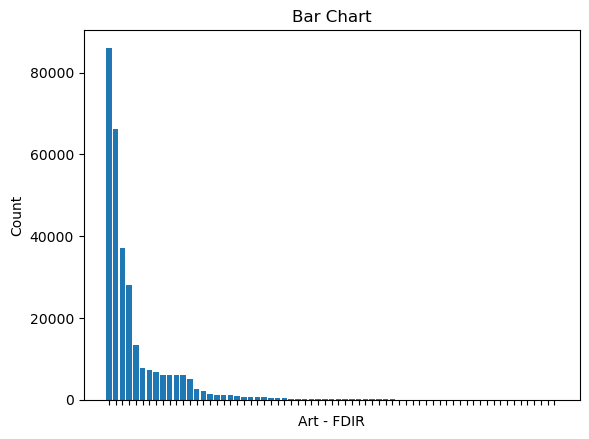

In [8]:
plt.bar(counts.index, counts.values)

plt.title("Bar Chart")

# Setting the X and Y labels
plt.xlabel('Art - FDIR')
plt.ylabel('Count')

# remove fish names(because to many names makes chart unreadable)
plt.gca().set_xticklabels([])

# Show bar chart of the count
plt.show()

Filtering the DataFrame (df) to include only rows where the value in the 'Art - FDIR' column is either 'Torsk' or 'Sei'.

In [9]:
df = df[(df['Hovedart FAO'] == 'Torsk') | (df['Hovedart FAO'] == 'Sei') | (df['Hovedart FAO'] == 'Dypvannsreke') | (df['Hovedart FAO'] == 'Hyse') | (df['Hovedart FAO'] == 'Lange')]


df.head()

,Startdato,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Hovedart FAO,Art - FDIR,Rundvekt,Bredde,Fartøylengde
1,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Hyse,Hyse,9594.0,"12,6","56,8"
2,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Hyse,Torsk,8510.0,"12,6","56,8"
3,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Hyse,Blåkveite,196.0,"12,6","56,8"
4,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Hyse,Sei,134.0,"12,6","56,8"
5,31.12.2017,"74,91","15,868",-403,267,"74,901","16,248",-277,11096.0,51.0,Hyse,Hyse,9118.0,"12,6","56,8"


Preprocessing specific columns in the DataFrame, converting them to strings, replacing commas with dots, converting them back to float, and mapping categorical values to numerical ones. This prepares the data for further analysis, ensuring the appropriate data types and formats are applied.

In [10]:
# Getting only 1 line from each boat to make the data clearer
df = df.loc[df['Hovedart FAO'] == df['Art - FDIR']]

float_columns = ['Startposisjon bredde', 'Startposisjon lengde', 'Havdybde start', 'Varighet',
                'Stopposisjon bredde', 'Stopposisjon lengde', 'Havdybde stopp', 'Trekkavstand', 'Redskap FDIR (kode)', 
                'Rundvekt', 'Bredde', 'Fartøylengde'] 
# Convert the relevant columns to string
df[float_columns] = df[float_columns].astype(str)

# Replace , with . for all float columns
for col in float_columns:
    df[col] = df[col].str.replace(',', '.')

# Convert the columns back to float
df[float_columns] = df[float_columns].astype(float)
mapping = {'Torsk':  0, 'Sei':  1, 'Dypvannsreke': 2, 'Hyse': 3, 'Lange': 4}
df['Hovedart FAO'] = df['Hovedart FAO'].map(mapping)

df.head()

,Startdato,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Hovedart FAO,Art - FDIR,Rundvekt,Bredde,Fartøylengde
1,30.12.2017,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,3,Hyse,9594.0,12.60,56.8
5,31.12.2017,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,3,Hyse,9118.0,12.60,56.8
11,31.12.2017,74.883,16.056,-346.0,315.0,74.924,15.742,-496.0,10215.0,51.0,3,Hyse,12432.0,12.60,56.8
17,31.12.2017,74.931,15.785,-443.0,243.0,74.926,15.894,-358.0,3214.0,51.0,0,Torsk,7022.0,12.60,56.8
19,01.01.2018,67.828,12.972,-71.0,63.0,67.827,12.942,-56.0,1269.0,61.0,3,Hyse,4.0,5.06,19.1


**Transforms the date information in the 'Startdato' column into a more useful format (numeric month values) and creates a new 'Month' column. It then drops the original date column, potentially to streamline the dataset or for other reasons depending on the specific analysis goals.**

In [11]:
# The dates are changed into values for each month so they can be used 
# We are now able to use all the coloms in stead of using our defines features and adding there
df['Startdato'] = pd.to_datetime(df['Startdato'], format='%d.%m.%Y')
df['Month'] = df['Startdato'].dt.month
df = df.drop('Startdato', axis=1)
df.head()

,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Hovedart FAO,Art - FDIR,Rundvekt,Bredde,Fartøylengde,Month
1,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,3,Hyse,9594.0,12.60,56.8,12
5,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,3,Hyse,9118.0,12.60,56.8,12
11,74.883,16.056,-346.0,315.0,74.924,15.742,-496.0,10215.0,51.0,3,Hyse,12432.0,12.60,56.8,12
17,74.931,15.785,-443.0,243.0,74.926,15.894,-358.0,3214.0,51.0,0,Torsk,7022.0,12.60,56.8,12
19,67.828,12.972,-71.0,63.0,67.827,12.942,-56.0,1269.0,61.0,3,Hyse,4.0,5.06,19.1,1


**# Notes**
**We change from 'ART - FDIR' to 'Hovedart FAO' for clearer data where we only get the boat where the art is the biggest volume the boat caugth. However, we keep the "ART - FDIR" in our dataframe for control and easy to check the fishes dedicated class.**


**Also by changing this we get clear data with no direct link to the answer, and still get good accuracy.**


In [12]:
# Defining the features and target for every model
features = ['Startposisjon bredde', 'Startposisjon lengde', 'Havdybde start', 'Varighet',
    'Stopposisjon bredde', 'Stopposisjon lengde', 'Havdybde stopp', 'Trekkavstand', 
    'Redskap FDIR (kode)', 'Rundvekt', 'Bredde', 'Fartøylengde', 'Month']
X = df[features]
y = df['Hovedart FAO']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [13]:
# Scale data for every model
scaler = StandardScaler()

# Apply the scaling transformation to the training data (X_train)
# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling transformation to the test data (X_test)
# Transform the test data using the parameters learned from the training data
X_test_scaled = scaler.transform(X_test)

# KNN 

When utilizing the K-Nearest Neighbors (KNN) algorithm, we opted to normalize the features. Normalization is beneficial because it ensures that no single feature disproportionately influences the model due to scale differences. By leveling the playing field for all features, we enhance the KNN algorithm's performance, enabling it to make more accurate predictions.

In [14]:
# Create a KNN classifier with  3 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = knn_classifier.predict(X_test_scaled)

# Evaluate the accuracy of the classifier
knn_accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {knn_accuracy}")

Accuracy: 0.8760121833444766


#### Confusion matrix in KNN 
The diagonal elements of the confusion matrix represent the correct predictions, while the off-diagonal elements represent the incorrect predictions.   
A good model is one which has high correct predictions while few false predictions . The Blue ones that goes diagnonal are the correct predictions. As you can see there are a significant higher number of true predicttions. We have decided to predict this amount of different fish because we wantted the predictions to be fairly correct. 

You can observe he numbers within the 300-400 value range. We have concluded that these might be difficult to differenciate because these species are different types of cod. And therefore might be more difficult to differenciate. Some of the squares that are similar in numbers that are not diagnonal are similar because sei and hyse is a type of torsk. And therefore you can seee it is more difficult to predict.
##### Taking a look at the data 



Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      5098
           1       0.88      0.88      0.88      3667
           2       0.99      0.99      0.99      2681
           3       0.72      0.68      0.70      1526
           4       0.94      0.89      0.91       489

    accuracy                           0.88     13461
   macro avg       0.88      0.86      0.87     13461
weighted avg       0.88      0.88      0.88     13461



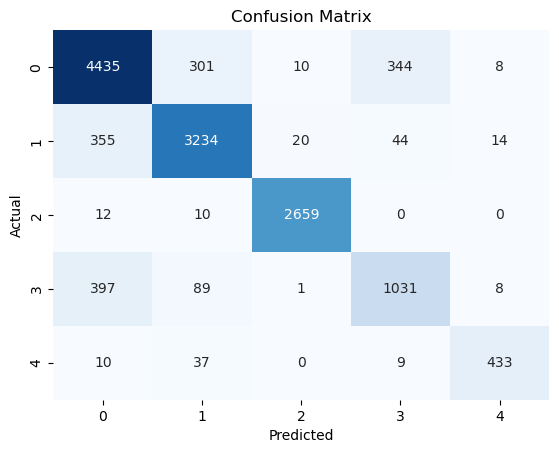

In [15]:
# Print the classification report
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)
cm = confusion_matrix(y_test, predictions)
# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

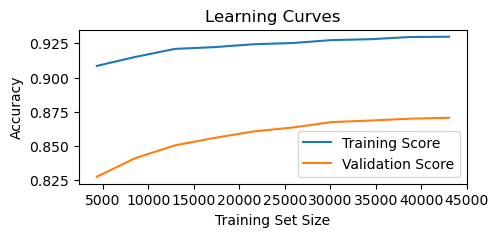

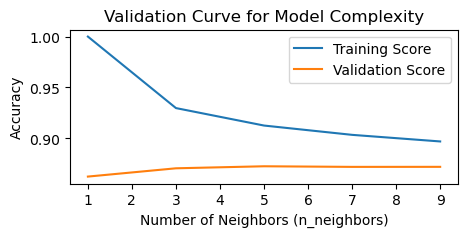

In [17]:
# Assessing Overfitting or Underfitting
# 1. Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    knn_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(5, 4))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curves')
plt.show()

# 2. Validation Curve for Model Complexity
param_range = [1, 3, 5, 7, 9]  # Example values for n_neighbors
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X_train_scaled, y_train, param_name='n_neighbors',
    param_range=param_range, cv=5, scoring='accuracy'
)

plt.figure(figsize=(5, 4))
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Curve for Model Complexity')
plt.show()

The training score is slightly higher than the validation score, which suggests some **overfitting** in the model.

# Deep Learning Keras

In [59]:
# The to_categorical function is used to convert a class vector (integers) to a binary class matrix, which is useful for multi-class classification problems.
labels_one_hot = to_categorical(y_train)
labels_one_hot_test = to_categorical(y_test)

In [60]:
# Build the Model
model = tf.keras.models.Sequential([
    keras.layers.Dense(500, activation='relu', input_shape=[len(features)]),
    keras.layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dropout(0.2),  # Another dropout layer
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dropout(0.2),  # Another dropout layer
    keras.layers.Dense(5, activation='softmax')  # Change to 'softmax' for multi-class problems
])
print(model.summary()) # Print summary of the model for better understanding of the output shape

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 500)               7000      
                                                                 
 dropout_15 (Dropout)        (None, 500)               0         
                                                                 
 dense_21 (Dense)            (None, 300)               150300    
                                                                 
 dropout_16 (Dropout)        (None, 300)               0         
                                                                 
 dense_22 (Dense)            (None, 150)               45150     
                                                                 
 dropout_17 (Dropout)        (None, 150)               0         
                                                                 
 dense_23 (Dense)            (None, 5)                

In [61]:
import visualkeras
visualkeras.layered_view(model)  # Visualize the visualization of layers in the model


In [62]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
#Train og fit.
epochs = 50
history = model.fit(X_train_scaled, labels_one_hot, epochs=epochs, validation_data=(X_test_scaled, labels_one_hot_test)) 

Epoch 1/50


1683/1683 [==============================] - 16s 8ms/step - loss: 0.5385 - accuracy: 0.7838 - val_loss: 0.4158 - val_accuracy: 0.8310
Epoch 2/50
1683/1683 [==============================] - 14s 8ms/step - loss: 0.4251 - accuracy: 0.8275 - val_loss: 0.3958 - val_accuracy: 0.8395
Epoch 3/50
1683/1683 [==============================] - 14s 8ms/step - loss: 0.3916 - accuracy: 0.8396 - val_loss: 0.3649 - val_accuracy: 0.8491
Epoch 4/50
1683/1683 [==============================] - 13s 8ms/step - loss: 0.3763 - accuracy: 0.8471 - val_loss: 0.3487 - val_accuracy: 0.8583
Epoch 5/50
1683/1683 [==============================] - 14s 8ms/step - loss: 0.3661 - accuracy: 0.8509 - val_loss: 0.3430 - val_accuracy: 0.8599
Epoch 6/50
1683/1683 [==============================] - 14s 8ms/step - loss: 0.3514 - accuracy: 0.8560 - val_loss: 0.3375 - val_accuracy: 0.8621
Epoch 7/50
1683/1683 [==============================] - 14s 8ms/step - loss: 0.3438 - accuracy: 0.8589 - val_loss: 0.3278 - val_accuracy: 0.8

The loss decreases over epochs, indicating that the model is improving. Higher accuracy values indicate better performance. Similar to loss, both training accuracy and validation accuracy are reported during training. The accuracy increases over epochs, indicating that the model is learning and making more accurate predictions.
The validation loss and accuracy metrics give insights into how well the model is generalizing to new, unseen data.

After the training is complete, the model is evaluated on the test dataset to assess its performance. The reported test accuracy shows how well the model is expected to perform in the real world.

In [64]:
test_loss, keras_test_acc = model.evaluate(X_test_scaled, labels_one_hot_test, verbose=2)
print('Test accuracy:', keras_test_acc)

421/421 - 1s - loss: 0.2925 - accuracy: 0.8834 - 1s/epoch - 4ms/step
Test accuracy: 0.8833667635917664


In [ ]:
# Difference betweened scaled and not scaled.
test_loss, test_acc = model.evaluate(X_test, labels_one_hot_test, verbose=2)
print('Test accuracy:', test_acc)

421/421 - 2s - loss: 3837.2156 - accuracy: 0.2629 - 2s/epoch - 4ms/step
Test accuracy: 0.26290765404701233


# Plotting Validation, loss and accuracy

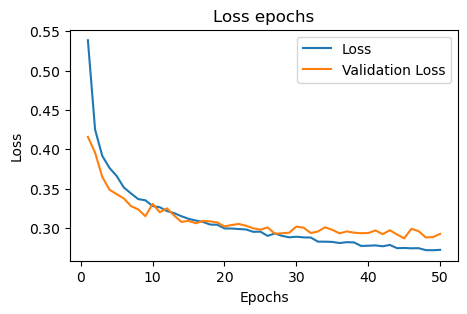

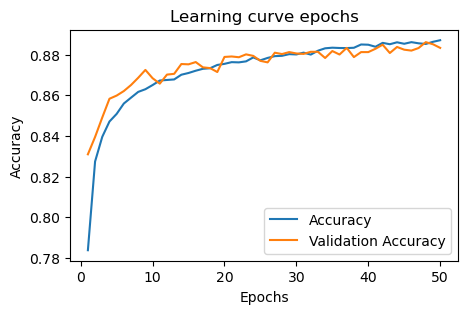

In [66]:
# Extracting loss and accuracy values for every epoch up to 10
loss_values = [history.history['loss'][epoch] for epoch in range(epochs)]
val_loss = [history.history['val_loss'][epoch] for epoch in range(epochs)]
accuracy_values = [history.history['accuracy'][epoch] for epoch in range(epochs)]
val_accuracy = [history.history['val_accuracy'][epoch] for epoch in range(epochs)]

# Plotting loss
plt.figure(figsize=(5, 3))
plt.plot(range(1, epochs+1), loss_values, label='Loss')
plt.plot(range(1, epochs+1), val_loss, label='Validation Loss')
plt.title('Loss epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Making 2 plots because the range varies diffentrly
 
# Plotting accuracy
plt.figure(figsize=(5, 3))
plt.plot(range(1, epochs+1), accuracy_values, label='Accuracy')
plt.plot(range(1, epochs+1), val_accuracy, label='Validation Accuracy')
plt.title('Learning curve epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The output tells us how the model's loss and accuracy change over training epochs, as well as how well it performs on both the validation and test datasets. Overall, the decreasing loss and increasing accuracy suggest that the model is learning and improving its performance as it trains. And showing trends of small under fitting, which becomes more of a overfitting with more than 30 epochs. 

## Supervised model: Logistic regression

In [22]:
# Creating and training the logistic regression model
model = LogisticRegression()


Splitting the data into training, validation, and testing sets to ensure that hyperparameter tuning does not overfit the test set.
Using the validation set (X_val_scaled, y_val) for model evaluation during the grid search. 
In GridSearchCV, the actual validation during hyperparameter tuning is done through cross-validation on the training set. The separate validation set here is conceptually useful for additional checks. 
Finally, evaluate the best model found by the grid search on the test set to get an unbiased estimate of the model's performance.


c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Best parameters found: {'model__C': 1, 'model__solver': 'liblinear'}
Best validation accuracy: 0.6682512962090096
Precision: 0.6516020528218194
Recall: 0.5835376272193745
F1 Score: 0.593184707108411
ROC-AUC: 0.8473321659207249
Accuracy on test set: 0.5698685090260753
              precision    recall  f1-score   support

           0       0.67      0.36      0.46      5103
           1       0.68      0.62      0.65      3693
           2       0.75      0.91      0.82      2674
           3       0.23      0.48      0.32      1497
           4       0.40      0.86      0.55       494

    accuracy                           0.57     13461
   macro avg       0.55      0.65      0.56     13461
weighted avg       0.63      0.57      0.57     13461



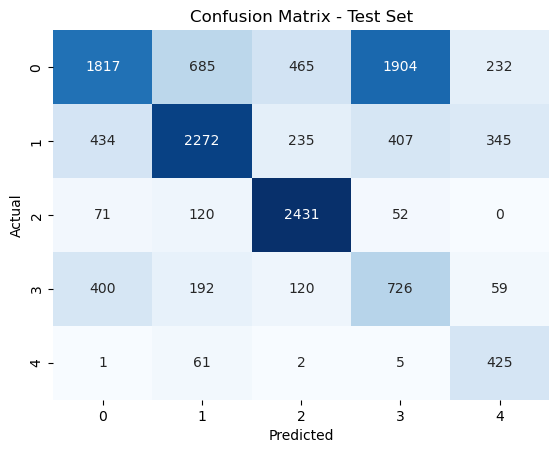

In [27]:
# First, split the data into a training set and a temporary set using an 80-20 split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# split the temporary set into the actual validation and training sets using a 75-25 split
# This results in effectively 60% training, 20% validation, and 20% testing splits of the original dataset
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42) 

# adding a balencer "smote" for the unbalance we see between"0" and "3" this insures that the data in the bigger group will not overwrite the smaller
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)



# Scale the features (it's important to fit the scaler only on the training data to prevent data leakage)
scaler = StandardScaler().fit(X_train_resampled)  # Fit on training data only
X_train_scaled = scaler.transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)  # Apply the same transformation to validation data
X_test_scaled = scaler.transform(X_test)  # And to test data

# Create the pipeline with a logistic regression model
logisticreg = LogisticRegression(max_iter=1000)
# Pipeline: Streamlines preprocessing and modeling steps, ensuring that transformations are applied consistently during both training and evaluation.
pipeline = Pipeline([
    ('model', logisticreg)
])

# Define the grid of parameters to search
param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__solver': ['liblinear', 'saga'],
    # Balance the class weights to account for class imbalance, as fish 0 is much more common than the other. and when the fish is to alike like the fish in the cod family, it will return 0 
}

# GridSearchCV: Automates the process of hyperparameter tuning and selects the best model configuration based on cross-validation performance. It also ensures your model is not just tuned to a specific subset of your data.
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model using grid search on the training set
grid.fit(X_train_scaled, y_train_resampled)
y_prob = grid.predict_proba(X_test)  # For ROC-AUC calculation, get the probability scores

# Weighted ROC-AUC 
classes = np.unique(y)
y_test_binarized = label_binarize(y_test, classes=classes)

# Fit the model (make sure to use the training set)
model.fit(X_train_scaled, y_train_resampled)

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test_scaled)
y_pred = model.predict(X_test_scaled)


# Best hyperparameters and accuracy on the validation set
print("Best parameters found:", grid.best_params_)
print("Best validation accuracy:", grid.best_score_)

print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=1))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Handling multi-class ROC-AUC
y_test_binarized = label_binarize(y_test, classes=np.unique(y))

# Ensure y_prob is shaped (n_samples, n_classes)
roc_auc = roc_auc_score(y_test_binarized, y_prob, multi_class='ovr', average='weighted')
print("ROC-AUC:", roc_auc)

# Evaluate on the test set
y_pred_test = grid.predict(X_test_scaled)
log_acc = accuracy_score(y_test, y_pred_test)
print("Accuracy on test set:", log_acc)
print(classification_report(y_test, y_pred_test, zero_division=1))

# Compute and visualize the confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.show()

####
# The detailed breakdown by class helps in understanding how well the model performs for each fish type:
# Classes with High Recall and Low Precision (e.g., Class 4): The model tends to over-predict these classes, capturing many true positives but at the cost of many false positives.
# Classes with Balanced Metrics (e.g., Class 2): Some classes show a good balance between precision and recall, suggesting effective model tuning and feature selection for these categories.
# Classes with Poor Overall Performance (e.g., Class 3): Low precision and moderate recall indicate challenges in distinguishing these classes from others, possibly due to overlapping features or insufficient training data.

**Impact on Model Performance**

**Model Bias**: With logistic regression, a heavy bias towards more populous classes or clusters can occur. The model may perform well in predicting the majority class but poorly on minority classes, as seen in typical precision-recall trade-offs.

**Parameter Estimation**: Logistic regression estimates parameters that best fit the data. When data is imbalanced, parameter estimation is skewed towards dominant classes, potentially underfitting minority classes.

Reflecting on the updated results and the model's performance, several aspects stand out which can guide further improvements and understanding of the model's strengths and limitations:

- **Best Parameters**: The optimal settings identified (`{'model__C': 1, 'model__solver': 'liblinear'}`) indicate that a lower regularization strength (`C= 1`) was more effective, suggesting that preventing overfitting is crucial given your dataset. The 'saga' solver is again validated as a good choice for this logistic regression, especially for handling multinomial logistic regression with a l1 or l2 penalty.
- **Validation vs. Test Accuracy**: The best validation accuracy (67.16%) is noticeably higher than the test accuracy (58.26%). This discrepancy could still hint at some overfitting or perhaps variations in class distribution between the validation and test sets.
- **Precision and Recall**: The precision (65.18%) and recall (58.45%) exhibit an imbalance, with the model generally being more conservative in its predictions (higher precision at the expense of recall).
- **F1 Score**: The F1 score (59.42%) is moderately low relative to precision and recall, pointing towards an imbalance where neither is optimized.
- A **ROC-AUC** close to (85%) suggests that the model provides a strong predictive performance, with a much better than random chance at correctly classifying the different fish types in your dataset. This relflects on a more reliable and accurate predictions, which are crucial for practical applications where discerning between different types of fish is necessary.

### Model Configuration and Regularization Strategy

#### Parameter Selection for Logistic Regression

For our logistic regression model, we followed these principles:

1. **Initial Simplicity**: We started with sklearn's default parameters to establish a robust baseline without immediate extensive hyperparameter tuning.

2. **Solver and Regularization Choice**: Using sklearn's `LogisticRegression` with the 'lbfgs' solver, default L2 regularization was applied to mitigate overfitting.

#### Regularization Techniques

Regularization is crucial for generalizability. Our model utilizes:

- **L2 Regularization**: Integrated into the 'lbfgs' solver, it penalizes large coefficients, promoting simpler models better suited for new data.

- **Adjusting Regularization Strength**: We can modify the `C` parameter inversely to adjust regularization strength, reducing overfitting risk, especially in high-dimensional datasets.

## Strategic insights for model improvment
**Error Analysis**:
Regularly analyze the **confusion matrix** and other detailed error metrics to understand where the model fails. This can provide insights into potential biases in the model or areas where additional data collection or feature engineering is required.

Logistic regression might be too simple to capture complex patterns, especially interactions and non-linear relationships. We might ensemble techniques like **RandomForest** or **Gradient Boosting Machine**s which can naturally handle non-linearity and provide feature importance insights.

# Clustering KMEANS

By using clustering, we aim to investigate whether different types of fish inhabit distinct geographical areas based on their coordinates. Additionally, we seek to determine if these spatial distributions significantly impact the performance of other models we are utilizing.

In [ ]:

# Selecting features
features = ['Startposisjon bredde', 'Startposisjon lengde']
X = df[features]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Note to self: In clustering, we typically don't split the data into training and testing sets in the same way as classification

In [ ]:
# KMeans clustering model
# Assuming the number of clusters to be 5 as I want 5 clusters 

# !! No need for PCA since we only be using 2 dimmensions
# !! No need for elbow method since we want 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=50, random_state=42)
kmeans.fit(X_scaled)

# In clustering, we don't make predictions in the same way as in classification. Instead, we assign each data point to a cluster.
labels = kmeans.labels_

In [29]:
# Evaluating the model
# One common way to evaluate clustering models is by using the silhouette score, which measures how similar an object is to its own cluster compared to other clusters.
silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

# Visualizing the clusters
# With use of StartPosisjon bredde and Startposisjon lengde its easy to visualize the clusters bassed on where the fish get "fished"
plt.figure(figsize=(10, 8))
sns.scatterplot(data=X, x='Startposisjon bredde', y='Startposisjon lengde', hue=labels, palette='viridis')
plt.title('Clusters of data points')
plt.show()

NameError: name 'silhouette_score' is not defined

**In the visualization, we observe that the coordinates are effectively divided into five distinct clusters, each located in a separate segment of the area.**

In [ ]:
# Putting the cluster data in to the dataframe
y_predict = kmeans.fit_predict(X_scaled)
print(y_predict)
df['cluster'] = y_predict
df.head()

[3 3 3 ... 3 3 3]


,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Hovedart FAO,Art - FDIR,Rundvekt,Bredde,Fartøylengde,Month,cluster
1,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,3,Hyse,9594.0,12.60,56.8,12,3
5,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,3,Hyse,9118.0,12.60,56.8,12,3
11,74.883,16.056,-346.0,315.0,74.924,15.742,-496.0,10215.0,51.0,3,Hyse,12432.0,12.60,56.8,12,3
17,74.931,15.785,-443.0,243.0,74.926,15.894,-358.0,3214.0,51.0,0,Torsk,7022.0,12.60,56.8,12,3
19,67.828,12.972,-71.0,63.0,67.827,12.942,-56.0,1269.0,61.0,3,Hyse,4.0,5.06,19.1,1,2


In [ ]:
# Counting how many classes are in each cluster
counts = df.groupby(['Hovedart FAO', 'cluster']).size().reset_index(name='count')

print(counts) # 20092

    Hovedart FAO  cluster  count
0              0        0   1613
1              0        1   8846
2              0        2   6269
3              0        3   7168
4              0        4   1109
5              1        0   9090
6              1        1   4966
7              1        2   4509
8              1        3      7
9              1        4      2
10             2        0   6744
11             2        1    595
12             2        2     87
13             2        3    448
14             2        4   5659
15             3        0    470
16             3        1   2382
17             3        2   2666
18             3        3   1849
19             3        4    410
20             4        0   2175
21             4        2    239


## Clustering conlclusion
Freindly reminder that 'Torsk':  0, 'Sei':  1, 'Dypvannsreke': 2, 'Hyse': 3, 'Lange': 4

Because the grupping of the clusters are "randomly" group by the cordinates, we expect to see some outliers in the cluster, but it helps us get a clearer look at where approximately the fish gets fished.

As anticipated, we observe a clear correlation among fish species such as "torsk," "sei," and "hyse," all belonging to the cod family, primarily being caught in locations 1 and 2. An exception to this pattern is "sei," which is also occasionally caught in location 0. Conversely, fish species not in the cod family, like "Dyppvannsreke," tend to be caught predominantly in clusters 3 and 0. Additionally, "Lange" is primarily caught in cluster 0. This observation suggests that similar fish species is a greater challenge for classification compared to dissimilar ones. As we can cleary see in the confussion matrix of the KNN model.

## Final Thoughts and discussing the consequenses
Throughout this group project, we have applied our knowledge and delved into the use of machine learning with our fisheries dataset. We have employed a variety of approaches, each offering unique insights and reflecting different facets of the underlying data.

During our process, we continuously experimented with different methods, experiencing both successes and failures. Below, we outline some of these processes and the consequences of our actions.

We have discovered that employing the data in various ways can lead to different outcomes. As noted, this project has extensively explored the application of machine learning to analyze fisheries data, utilizing diverse methodologies to enhance predictive capabilities and understand marine population dynamics. Each phase, from data preprocessing to model deployment, had its implications and consequences, which we discuss in the following sections.


### Key Findings and Methodological Insights:
**Processing the data :**
Our decision to selectively drop columns and handle NaN values by elimination was nacaserry for both accuracy, size and time. It made the analytical process and enhanced the accuracy and efficiency of the floowing models. This choice, though involving some loss of data, was justified by the sigificant reduction in missing values and minimal impact on data integrity, as evidenced by our visual analysis. 
Selectively choosing which features to include based on our initial assumptions may introduce bias. This choice could affect the models' accuracy, especially if omitted features hold predictive power or contain hidden patterns relevant to the fisheries' ecological dynamics. 
But dropping columns and rows containing NaN values steamlined the dataset and reduced processing time, leading to gains in model performance. However, this approach potentially discarded valuable information that could contribute to understanding fish population dynamics. The loss of this data might limit the model's ability to generalize to new, unseen scenarios where such information could be crucial. Overall our group concluded that the gain would be increase the efficianty and overruled the downsides. 

**Performance:**

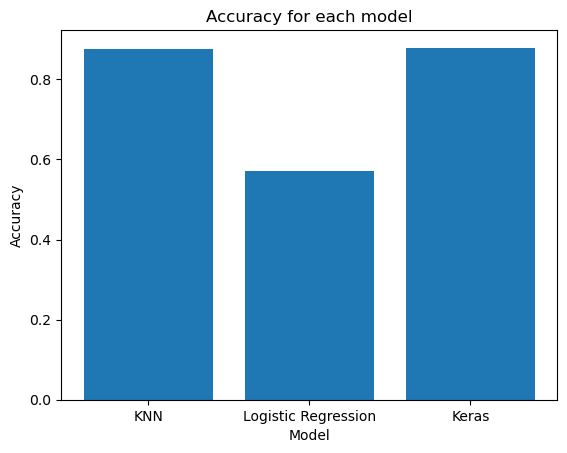

In [28]:
# Plotting the accuracy for each model
plt.bar(['KNN', 'Logistic Regression', 'Keras'], [knn_accuracy,log_acc,keras_test_acc])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy for each model')
plt.show()


   - The **K-Nearest Neighbors (KNN)** model exhibited superior performance across various metrics, including precision, recall, and F1-score. This suggests that KNN's non-parametric nature and its ability to capture complex, non-linear relationships between features made it particularly effective for our dataset, which features imbalanced classes and intricate patterns.
The high performance of the KNN model in handling non-linear relationships and class imbalances reflects its robustness in ecological data analysis. However, KNN's reliance on a large amount of data for making predictions can be computationally intensive and might not scale well with even larger datasets or in real-time applications.
One of the main reasons we decided to use KNN because we knew our data was imbalanced and not linear. Comparing the results with linear regression you can see the big increase in accuracy and precision when using KNN. Therefore we knew KNN was a good match for our non linear dataset. Considering KNN we also had in mind that it would be more resilient in scenarios where some types of fish being more frequent than others. The performance of KNN heavily depends on the selection of relevant features. Irrelevant or redundant features can significantly degrade the model’s performance. Still weighing the options this was our best. 


   - **The Logistic regression model**, designed with a focus on simplicity and effective L2 regularization, serves as a solid baseline by balancing model complexity and generalization ability. Despite its strength in classifying frequent fish types, as indicated by a high weighted ROC-AUC score, it faces challenges with non-linear decision boundaries and class imbalances, limiting its effectiveness in complex ecological datasets. Future enhancements should involve refining hyperparameters such as regularization strength (`C`), optimizing precision and recall, and addressing class imbalance to improve robustness and generalizability, especially in scenarios with non-straightforward relationships between features and classes. Logistic regression is a practical choice for classifying fish types due to its simplicity, interpretability, and computational efficiency. It provides useful probabilistic outputs and excels in binary classification tasks. However, its assumption of linear relationships, sensitivity to class imbalances, and the need for feature scaling can limit its effectiveness, particularly in complex or nonlinear datasets. 

   
   - Our **Deep Learning** model demonstrated impressive learning capabilities, as shown by the consistent improvement in loss and accuracy across epochs. This approach proved particularly adept at generalizing from training to unseen test data, achieving the highest accuracy of 87.21%.
While the Deep Learning model showed excellent performance and adaptability, there is a risk of overfitting with more extensive training. However, our analysis reveals close to 0 evidence of overfitting or underfitting in our model, suggesting that additional epochs could be incorporated to further enhance its capabilities.
In out DL model we used the Adam optimizers while using tenserflow and Keras. These are quite sutible for big datasets and are very user friendly. TensorFlow provides scalable and versatile infrastructure, supporting both CPU and GPU processing. Keras offers an intuitive interface for quick model prototyping and seamless integration with TensorFlow, enhancing functionality. The Adam optimizer ensures efficient model training with adaptive learning rates, making it ideal for handling large and complex datasets.



 **Clustering Analysis:**
   - We used **K-means** clustering to segment the data, as it effectively partitions data points based on their proximity, ensuring that neighboring data points are grouped together within the same cluster. This approach enables us to more easily identify the regions where fishing activity is concentrated within these clusters.

   - The clustering analysis revealed distinct patterns in the geographic distribution of different fish species. This discovery might explain why certain models perform better for some species than for others. The findings underscore the significance of location and habitat in our study, highlighting how environmental factors influence predictive modelling.
Additionally, clustering provided insights into the spatial distribution of fish species, crucial for ecological conservation efforts. Understanding these patterns is key to predicting changes in fish populations due to environmental challenges like climate change, overfishing, or habitat destruction.

**Our data:**
Logistic regression's inadequate performance in our analysis is primarily attributed to its inherent assumption of linear relationships between predictors and outcomes. This is particularly limiting when dealing with habitat-sharing fish species that exhibit only nuanced differences, often leading to a higher rate of misclassification. Furthermore, the prevalence of certain species within the dataset predisposes the model to favor these majority classes, compromising its ability to accurately recognize less common species. The confusion matrix reflects this with increased off-diagonal entries, signifying erroneous predictions. Since logistic regression is designed to fit a linear decision boundary, it naturally struggles where species distributions intersect and require more complex separation criteria. Consequently, the model's capacity to discern among overlapping species categories is diminished, as it tends to lack a definitive threshold for clear differentiation.

Species with a higher presence in the dataset, and hence more data, generally receive better predictions from machine learning models. However, in our case, this isn't true. Larger classes such as 'Torsk' and 'Sei' are too similar. Therefore, species with less data, but clearer representation (as the data is more indicative of the species), receive higher scores. Espescially where the class imbalance is significantly larger. The KNN model outperforms logistic regression due to its ability to handle the intricacies of the ecological data, such as non-linearity and class imbalances. Logistic regression falls short primarily due to its linear nature and difficulty with overlapping feature distributions among species sharing similar habitats. The significant presence of certain species allows models to learn more effectively, resulting in more accurate predictions for these species. However, even with a high data count, logistic regression might still struggle if the differences between species are not linearly definable.

Overall the project improved our ability to predict and understand marine populations, supporting more informed and strategic conservation and management decisions.
This project has demonstrated the potential of machine learning to transform data into actionable insights, which can significantly impact sustainable fisheries management and conservation strategies. While the chosen methodologies have shown promising results, continuous refinement and consideration of the ecological context are necessary to ensure that the models remain effective, and relevant in a rapidly changing world.